# Decision Tree Assignment:

In [ ]:
Decision Tree
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?



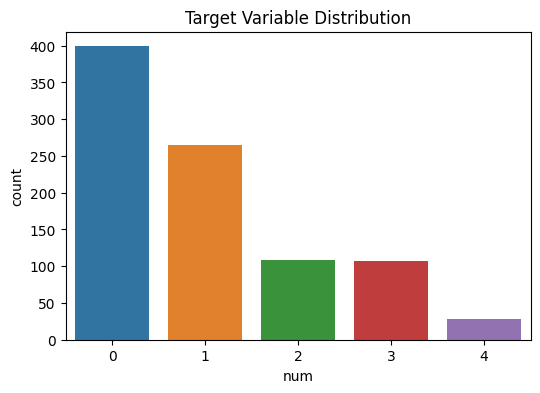

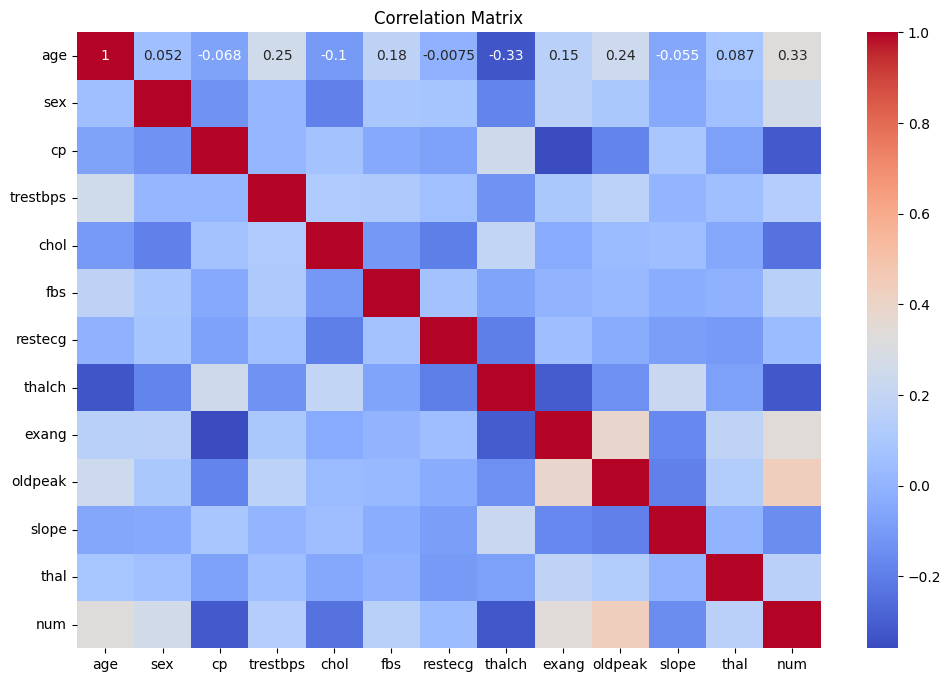


Model Evaluation:
Accuracy: 0.5054945054945055
Precision: 0.30102928127772843
Recall: 0.2991390274189349
F1 Score: 0.29874456464540494

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        89
           1       0.39      0.40      0.39        48
           2       0.25      0.18      0.21        22
           3       0.15      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.50      0.51      0.50       182



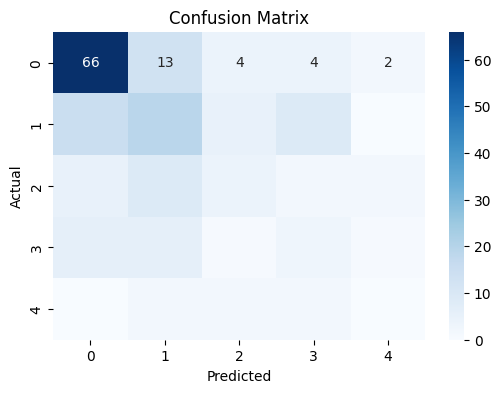

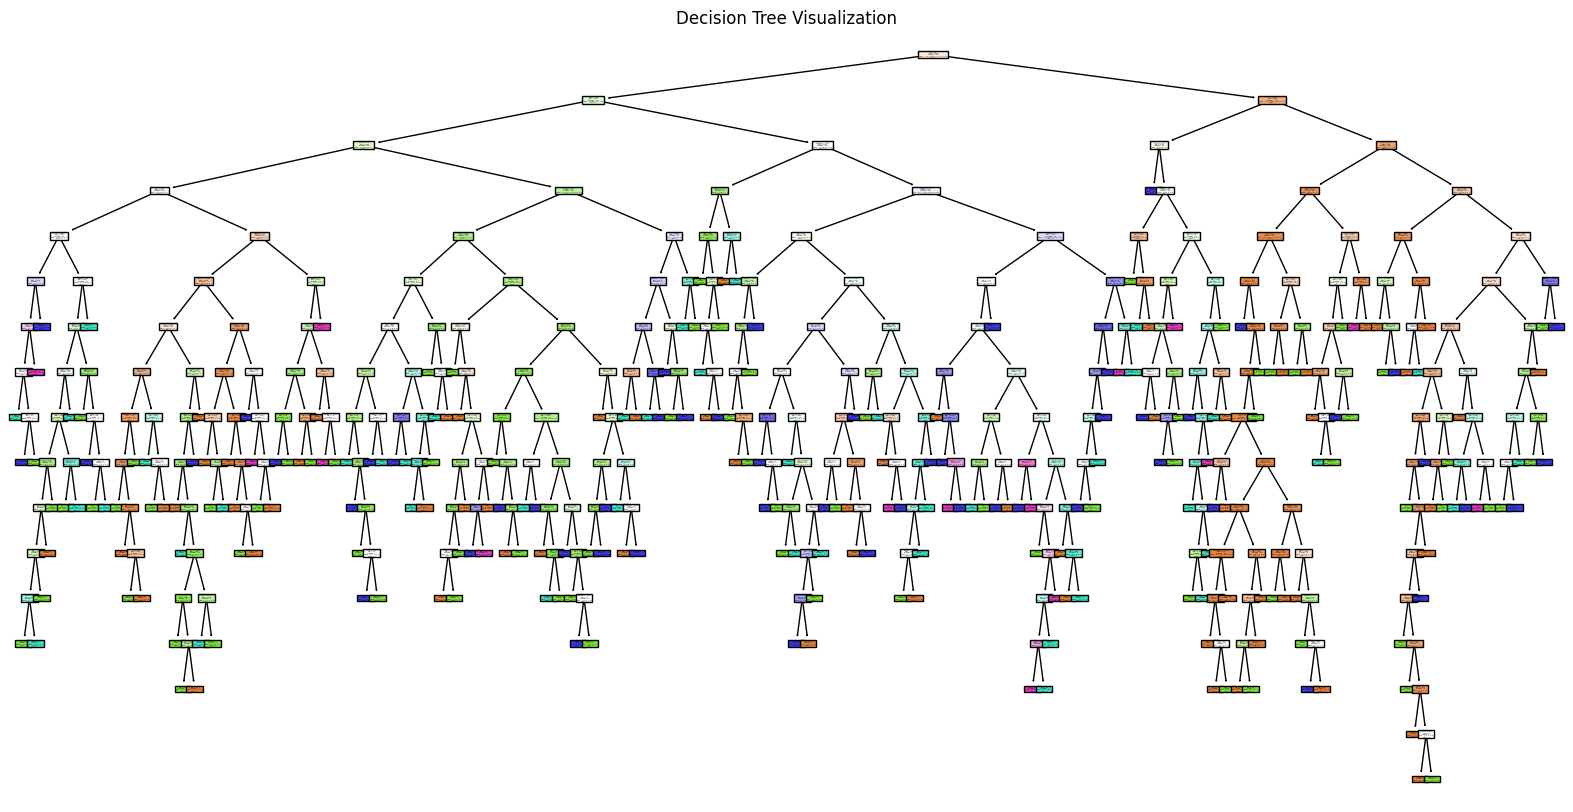

In [10]:
# Decision Tree Classification Project for Heart Disease Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_excel(r'C:\Users\hp\Desktop\Heartdisease.xlsx')

# Fix column types (convert bool to string first)
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(str)

# Encode categorical columns safely
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)  # Ensure all are strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Target column (last one assumed)
target_col = df.columns[-1]

# EDA: Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Prepare features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Plot
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
1. What are some common hyperparameters of decision tree models, and how do they affect the models performance?
Answer = max_depth: Limits how deep the tree can grow. Prevents overfitting.
        min_samples_split: Minimum number of samples to split a node. Higher values reduce overfitting.
        criterion: Function to measure split quality (gini or entropy).
        min_samples_leaf: Minimum samples required at a leaf node. Higher = smoother model.


2. What is the difference between Label encoding and One-hot encoding?
Answer = Label Encoding: Converts categories to numbers (e.g., red=0, blue=1).
One-hot Encoding: Creates binary columns for each category (e.g., red=1 0, blue=0 1).
Difference: One-hot avoids implying ordinal relationship, label encoding might mislead models with such implication.